In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [3]:
# import model vit_minst
import vit_tests_2

model: tf.keras.Model = tf.keras.models.load_model('./mints10',
                                                custom_objects={
                                                      'ClassToken': vit_tests_2.ClassToken,
                                                      'AddPositionEmbs': vit_tests_2.AddPositionEmbs,
                                                      'MultiHeadSelfAttention': vit_tests_2.MultiHeadSelfAttention,
                                                      'TransformerBlock': vit_tests_2.TransformerBlock,
                                                      'ViT': vit_tests_2.ViT,
                                                    }
                                                ) # type: ignore

model.summary()

c:\Users\Maciej\miniconda3\envs\tf\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\Maciej\miniconda3\envs\tf\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you 

Model: "vit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Conv2D)          multiple                  272       
                                                                 
 class_token (ClassToken)    multiple                  16        
                                                                 
 Transformer/posembed_input   multiple                 1040      
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   multiple                 1696      
 (TransformerBlock)                                              
                                                                 
 Transformer/encoderblock_1   multiple                 1696      
 (TransformerBlock)                                              
                                                               

# Transform 16x16 patch using dense layer?

In [4]:
model.layers

In [5]:
# output shape
[var.name for var in model.layers[2].variables]

['Transformer/posembed_input/pos_embedding:0']

In [6]:
# check shapes
for var in model.layers[2].variables:
    print(var.name, var.shape)

Transformer/posembed_input/pos_embedding:0 (1, 65, 16)


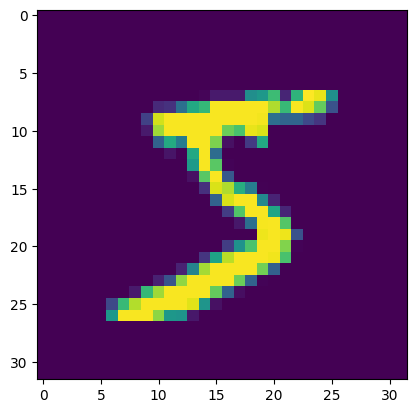

In [7]:
train, test = keras.datasets.mnist.load_data()

x_train, y_train = train

y_train = y_train.astype("float32")

x_train = np.pad(x_train, ((0, 0), (2, 2), (2, 2)), mode='constant', constant_values=0)
x_train = x_train.reshape(x_train.shape[0], 1, 32, 32)

x_test, y_test = test

y_test = y_test.astype("float32")

x_test = np.pad(x_test, ((0, 0), (2, 2), (2, 2)), mode='constant', constant_values=0)
x_test = x_test.reshape(x_test.shape[0], 1, 32, 32)

import matplotlib.pyplot as plt

sample = x_train[0].reshape(32, 32)

plt.imshow(sample)

(2, 2, 65, 65)
(2, 2, 65, 65)
(2, 2, 65, 65)
(2, 2, 65, 65)
(2, 2, 65, 65)
(2, 2, 65, 65)
(2, 2, 65, 65)
(2, 2, 65, 65)
(2, 2, 65, 65)
(2, 2, 65, 65)


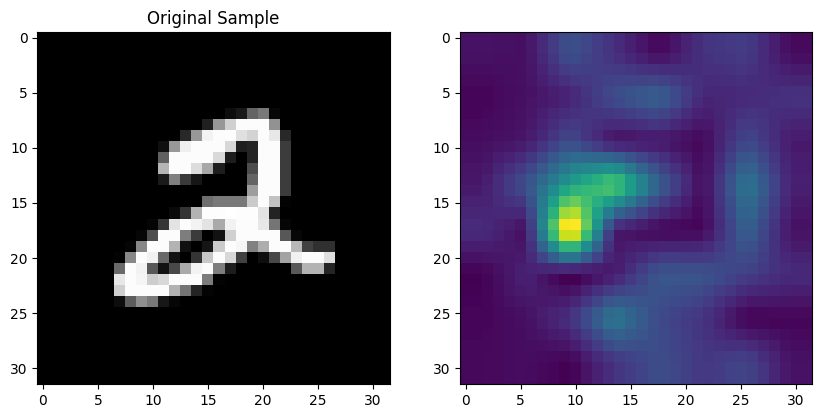

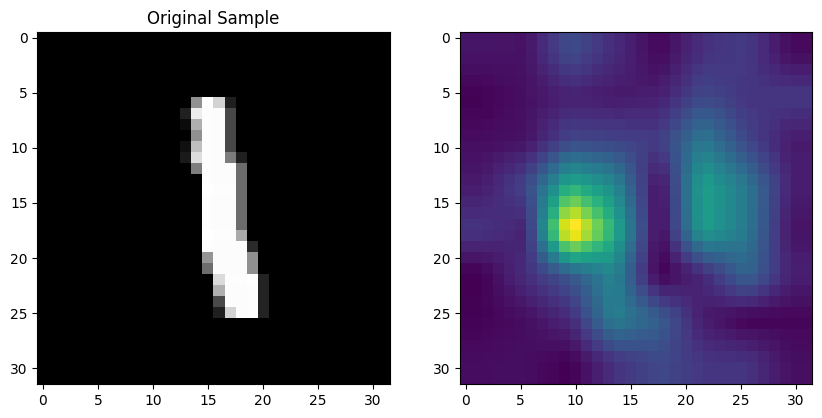

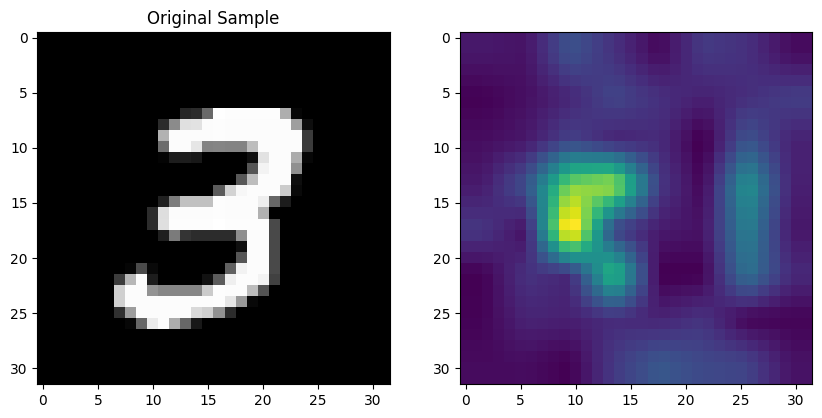

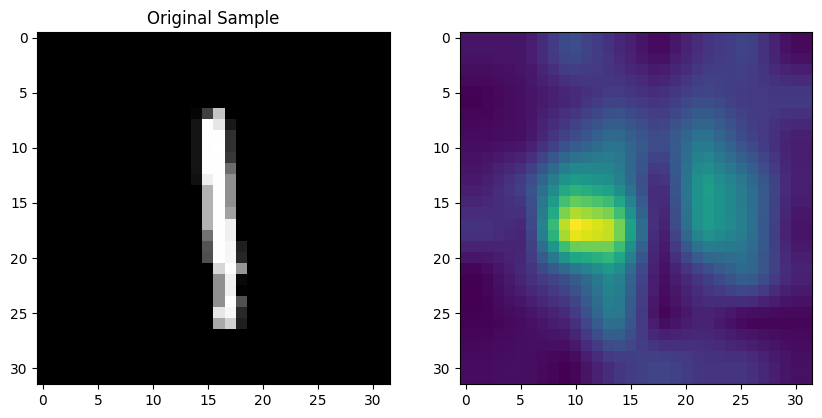

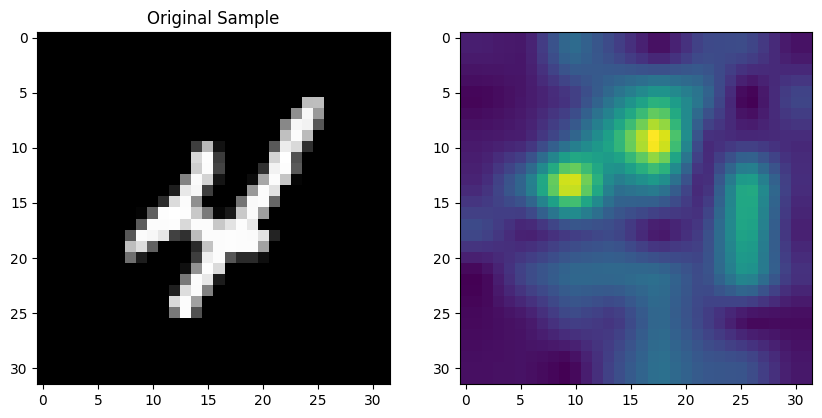

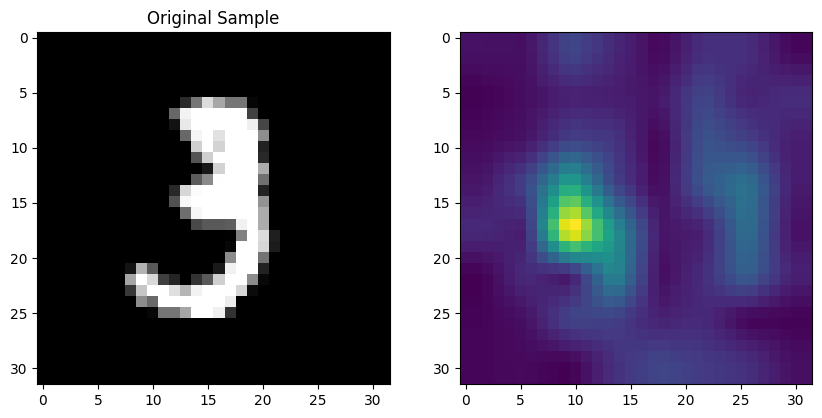

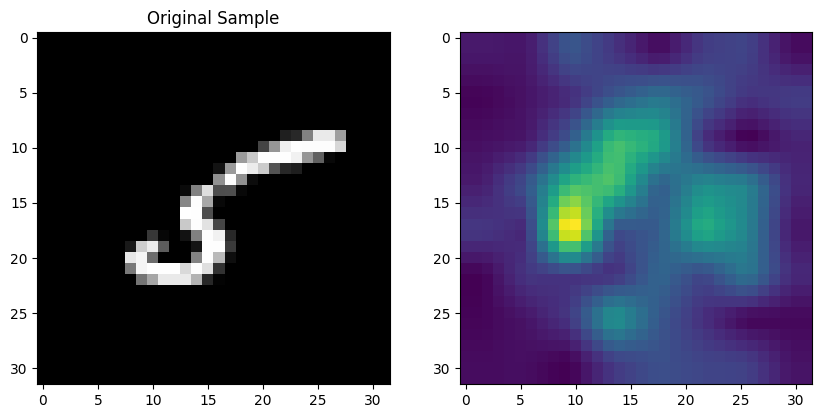

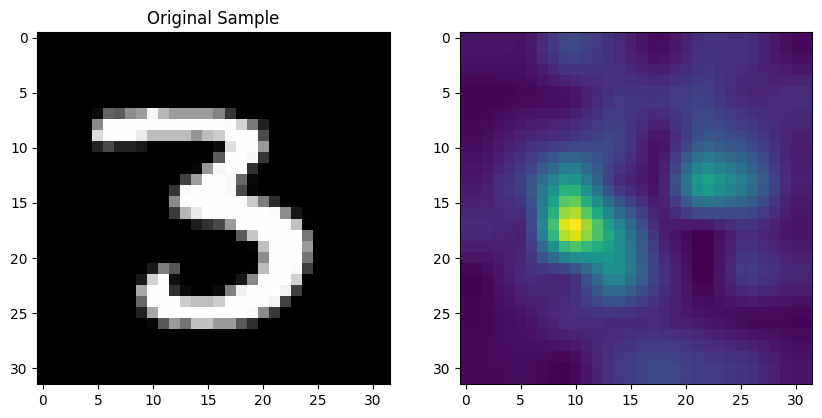

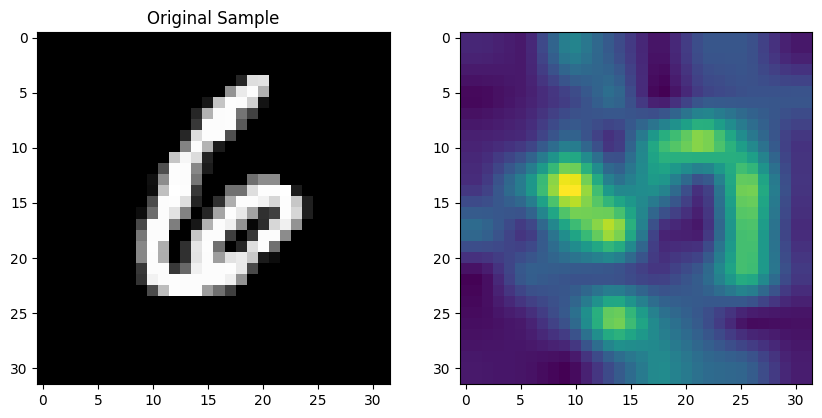

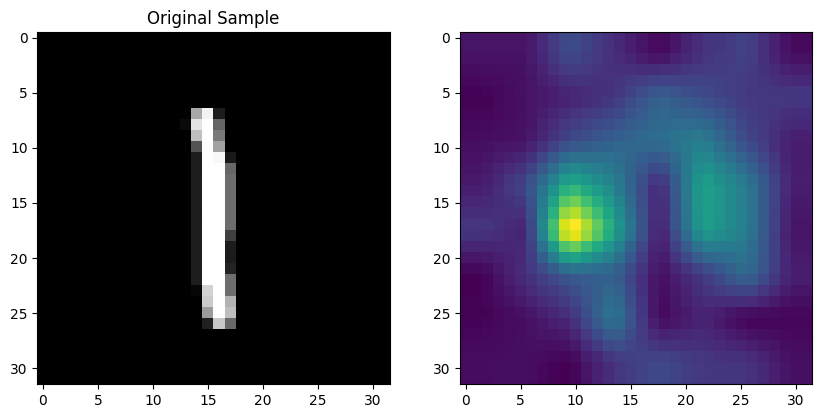

In [12]:
for i in range(5,15):
    sample = x_train[i].reshape(1, 32, 32, 1)

    plt.figure(figsize=(10, 5))

    # First plot: Original sample
    plt.subplot(1, 2, 1)
    plt.imshow(sample.reshape(32, 32, 1), cmap='gray')
    plt.title('Original Sample')

    sample = sample / 255.0
    sample = sample.astype('float32')
    sample = sample.reshape(32, 32, 1)

    # Second plot: Attention map
    attentions = vit_tests_2.attention_map(model, sample)

    # apply softmax to get probabilities for each patch

    plt.subplot(1, 2, 2)
    plt.imshow(attentions)


plt.show()